In [1]:
!pip install scikit-learn surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505186 sha256=7fee09f8b89e728dbb1040f168f27d67e8292dc0151034fc0103578dbfb81bef
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [14]:
import pandas as pd

# Load datasets
movies = pd.read_csv("/content/movies.csv")
ratings = pd.read_csv("/content/ratings.csv")

# Merge data
movie_ratings = pd.merge(ratings, movies, on='movieId')
movie_ratings.head(20)


,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,112,3.5,1094785740,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
6,1,151,4.0,1094785734,Rob Roy (1995),Action|Drama|Romance|War
7,1,223,4.0,1112485573,Clerks (1994),Comedy
8,1,253,4.0,1112484940,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
9,1,260,4.0,1112484826,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


In [3]:
# Step 1: Create a mapping from movieId to newId
unique_ids = {movie_id: idx for idx, movie_id in enumerate(movies["movieId"].unique(), start=1)}
movies["newId"] = movies["movieId"].map(unique_ids)

# Step 2: Apply this mapping to movie_ratings
movie_ratings["movieId"] = movie_ratings["movieId"].map(unique_ids)

# Step 3: Replace old movieId with newId in movies
movies["movieId"] = movies["newId"]

# Step 4: Drop newId if it's no longer needed
movies.drop(columns=["newId"], inplace=True)


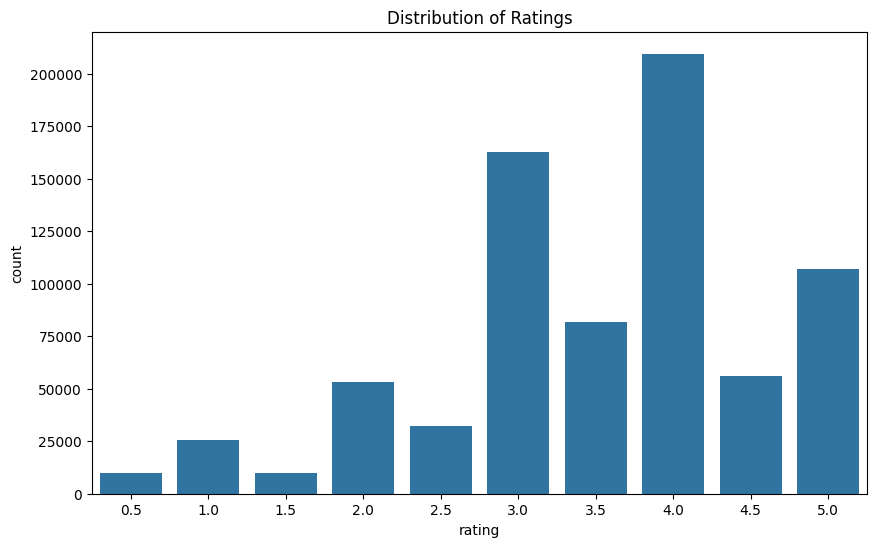

,movieId,title,genres
1705,1706,Mass Transit (1998),Comedy|Drama
5141,5142,Return of the Secaucus 7 (1980),Drama
7877,7878,"Door in the Floor, The (2004)",Drama
8338,8339,Dr. Jekyll and Mr. Hyde (1920),Drama|Horror|Sci-Fi


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.show()

# Top 10 movies by average rating
avg_ratings = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False)
top_movies = avg_ratings.head(10).index
movies[movies['movieId'].isin(top_movies)]

In [5]:
# Drop NaN values before pivoting
ratings = ratings.dropna(subset=["userId", "movieId", "rating"])

# Convert IDs to integer to avoid datatype issues
ratings["userId"] = ratings["userId"].astype(int)
ratings["movieId"] = ratings["movieId"].astype(int)

# Check unique values
print(f"Unique users: {ratings['userId'].nunique()}, Unique movies: {ratings['movieId'].nunique()}")


Unique users: 4978, Unique movies: 13468


<ipython-input-5-637129874fcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["userId"] = ratings["userId"].astype(int)
<ipython-input-5-637129874fcc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["movieId"] = ratings["movieId"].astype(int)


In [6]:
min_ratings = 10
ratings = ratings.groupby("userId").filter(lambda x: len(x) >= min_ratings)
ratings = ratings.groupby("movieId").filter(lambda x: len(x) >= min_ratings)

# Ensure valid data remains
if ratings.empty:
    raise ValueError("No valid ratings remain after filtering.")

# Create pivot table safely
user_item_matrix = ratings.pivot_table(index="userId", columns="movieId", values="rating", aggfunc="mean").fillna(0)

# Output shape
print(f"User-Item Matrix Shape: {user_item_matrix.shape}")


User-Item Matrix Shape: (4978, 6146)


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute item-item similarity
item_similarity = cosine_similarity(user_item_matrix.T)

# Convert to DataFrame for readability
item_sim_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def get_similar_movies(movie_id, n=10):
    similar_scores = item_sim_df[movie_id]
    similar_movies = similar_scores.sort_values(ascending=False).iloc[1:n+1]
    return movies[movies['movieId'].isin(similar_movies.index)]

# Example: Find movies similar to "The Dark Knight" (movieId=1)
similar_movies = get_similar_movies(1, n=5)
print(similar_movies[['title', 'genres']])

                                                  title                genres
259                           Little Princess, A (1995)        Children|Drama
355                          I Like It Like That (1994)  Comedy|Drama|Romance
779   Hungarian Fairy Tale, A (Hol volt, hol nem vol...               Fantasy
1209                                       Trust (1990)  Comedy|Drama|Romance
1269                        Pink Floyd: The Wall (1982)         Drama|Musical


In [8]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split
# Filter out users and movies with very few ratings to reduce memory usage
min_ratings = 10  # Adjust this value as needed
filtered_ratings = ratings.groupby("userId").filter(lambda x: len(x) >= min_ratings)
filtered_movies = ratings.groupby("movieId").filter(lambda x: len(x) >= min_ratings)

# Load data into Surprise format
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(filtered_ratings[['userId', 'movieId', 'rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Use Item-Based Collaborative Filtering with Cosine Similarity
sim_options = {'name': 'cosine', 'user_based': False}  # Item-based for lower memory use
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Get top 5 movie recommendations for a given user
user_id = 1  # Change this to the user you want to recommend movies for

# Get movies the user has not rated yet
user_ratings = filtered_ratings[filtered_ratings['userId'] == user_id]
unrated_movies = filtered_movies[~filtered_movies['movieId'].isin(user_ratings['movieId'])]

# Predict ratings for unrated movies
predictions = [(movie_id, model.predict(user_id, movie_id).est) for movie_id in unrated_movies['movieId']]

# Sort by predicted rating and get the top 5 recommendations
top_recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]
recommended_movie_ids = [movie_id for movie_id, _ in top_recommendations]

# Display recommended movies
print(movies[movies['movieId'].isin(recommended_movie_ids)])


Computing the cosine similarity matrix...
Done computing similarity matrix.
     movieId               title                genres
109      110  Taxi Driver (1976)  Crime|Drama|Thriller


In [9]:
from surprise import SVD
from surprise import accuracy

# Train SVD model
model_svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
model_svd.fit(trainset)

# Evaluate
test_predictions = model_svd.test(testset)
print("RMSE:", accuracy.rmse(test_predictions))

# Generate recommendations for a user
def recommend_svd(user_id, n=5):
    user_unrated = movies[~movies['movieId'].isin(user_ratings['movieId'])]
    predictions = [model_svd.predict(user_id, movie_id) for movie_id in user_unrated['movieId']]
    top = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    return [movies[movies['movieId'] == int(i.iid)].title.values[0] for i in top]

print(recommend_svd(1))

RMSE: 0.8312
RMSE: 0.8312291837887795
['Run of the Country, The (1995)', 'Dirty Dozen, The (1967)', 'I Shot a Man in Vegas (1995)', 'East of Eden (1955)', 'Live Forever (2003)']


In [10]:
def hybrid_recommendation(user_id, movie_id, n=5):
    # Item-based similarity
    similar_movies = get_similar_movies(movie_id, n=100)
    # User-based predictions
    user_predictions = recommend_svd(user_id, n=100)
    # Merge and rank
    hybrid = list(set(similar_movies['title']) & set(user_predictions))
    return hybrid[:n]

# Example: Recommend movies similar to movieId=1 (The Dark Knight) for user=1
print(hybrid_recommendation(1, 1))

['Tarantula (1955)', 'Second Best (1994)', 'Trust (1990)', 'Taxi Driver (1976)']


In [11]:
from surprise.model_selection import cross_validate

# Cross-validation for SVD
cross_validate(model_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8348  0.8375  0.8365  0.8358  0.8372  0.8364  0.0010  
MAE (testset)     0.6387  0.6418  0.6398  0.6398  0.6412  0.6403  0.0011  
Fit time          12.41   13.51   13.87   12.69   12.94   13.08   0.53    
Test time         2.07    1.34    1.69    1.40    1.79    1.66    0.27    


{'test_rmse': array([0.83478461, 0.83753856, 0.83647548, 0.83576409, 0.83722688]),
 'test_mae': array([0.6386964 , 0.64177772, 0.6397977 , 0.63983912, 0.6411714 ]),
 'fit_time': (12.41157579421997,
  13.505717992782593,
  13.866081237792969,
  12.689938306808472,
  12.94162893295288),
 'test_time': (2.070087432861328,
  1.3438746929168701,
  1.6864099502563477,
  1.3999459743499756,
  1.7937138080596924)}

In [13]:
import pickle
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(model_svd, f)